In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import sys
models_path = "/home/noam.koren/multiTS"
if models_path not in sys.path: sys.path.append(models_path)

from NFT.data.proccess_data_functions import plot_df

In [2]:
df = pd.read_csv("/home/noam.koren/multiTS/NFT/data/web/train_1.csv.zip", compression = "zip")
missing_values = df.isnull().sum()
total_missing_values = missing_values.sum()
df = df.fillna(0)

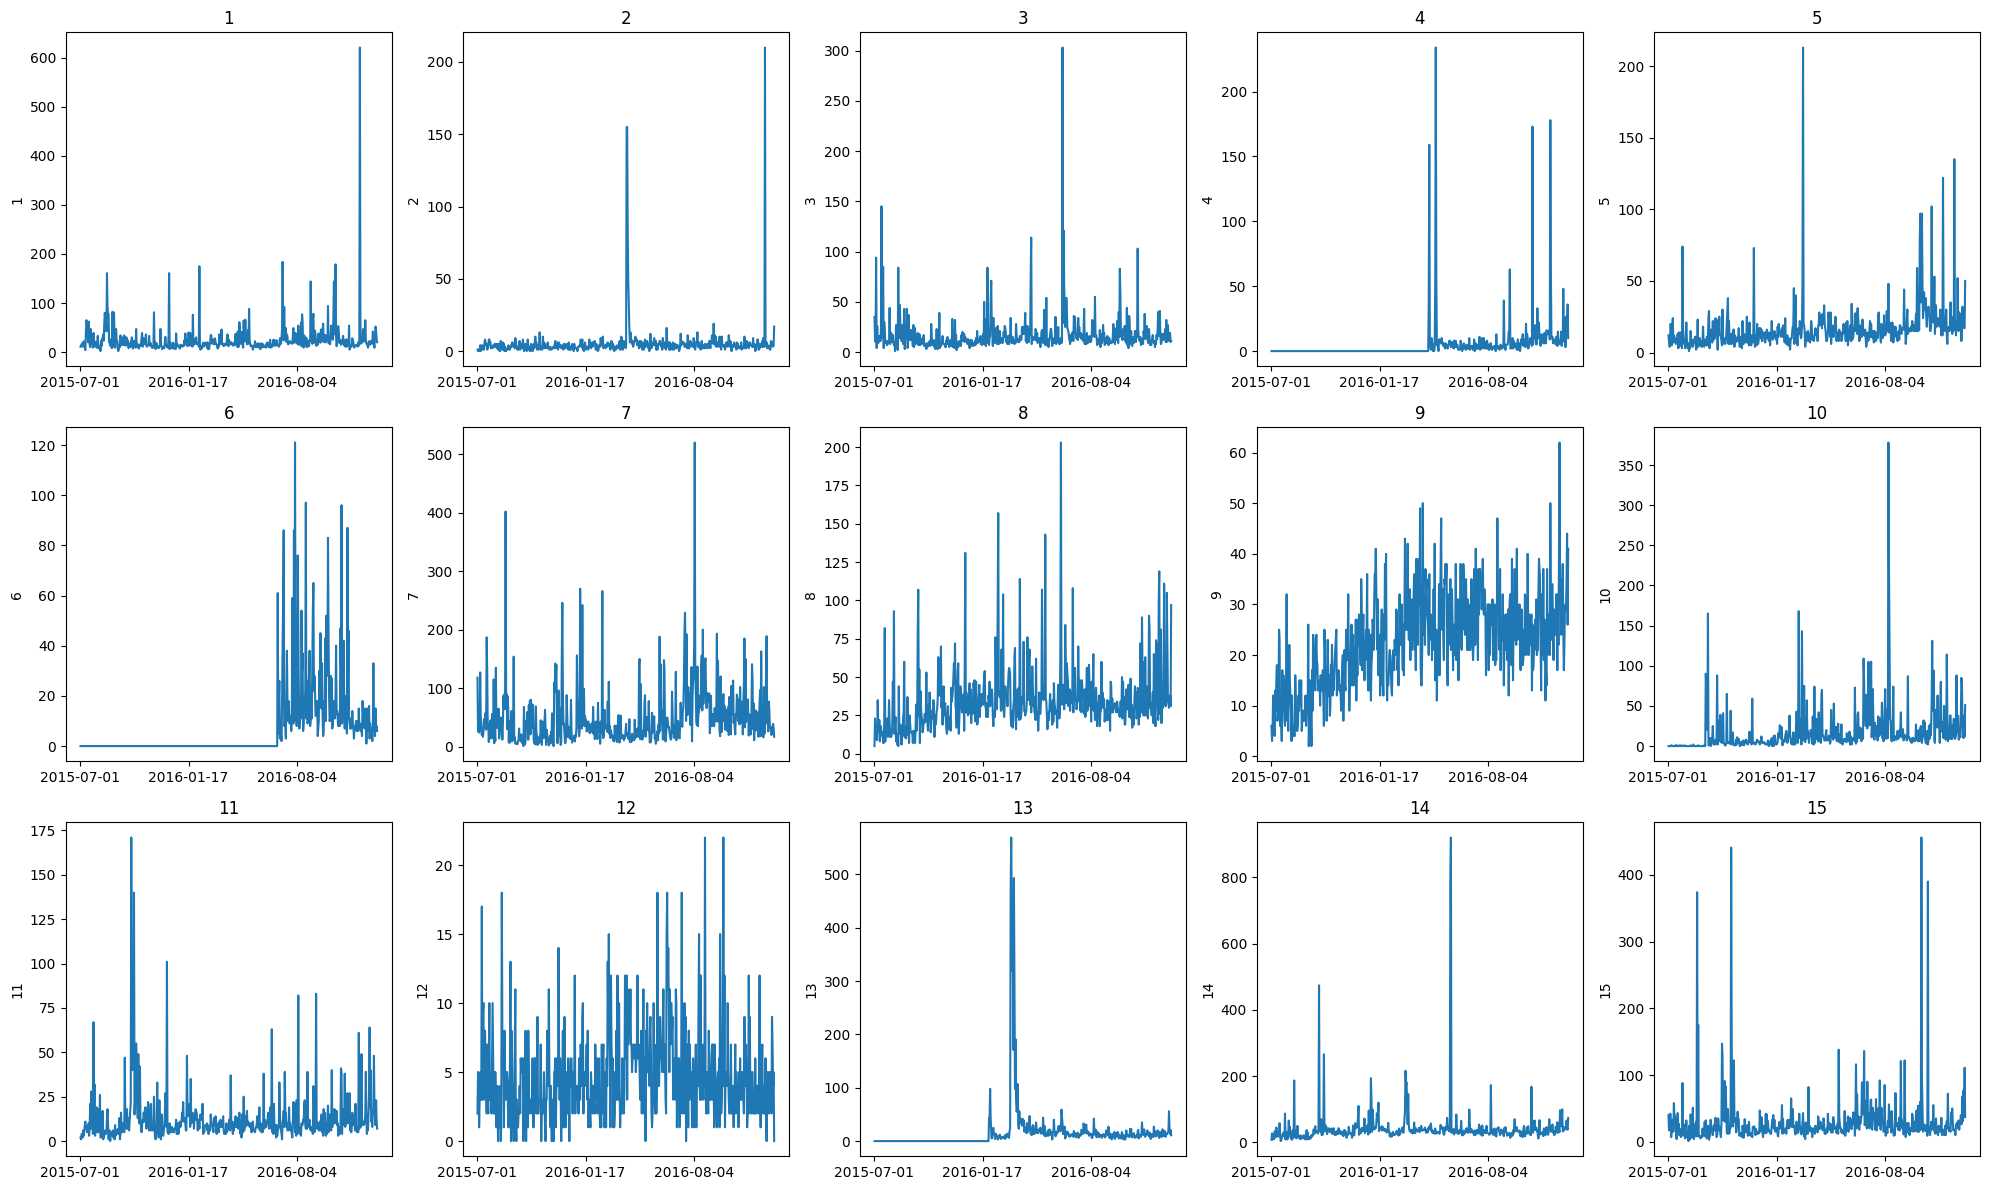

In [3]:
plot_df(df.iloc[1:16, 1:].T)

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

def poly_loss(y):  
    time = np.array([i for i in range(y.shape[0])])
    degree = 3
    
    num_vars = y.shape[1]
    
    mse_lst = []
    # Calculate the number of rows needed for the subplots
    # num_rows = (num_vars + 4) // 5  # +4 to handle any remainder less than 5 for an extra row
    # plt.figure(figsize=(20, num_rows * 4))  # Adjust figure size based on the number of plots and rows

    # Create a subplot for each variable
    for i in range(num_vars):
        values = np.array(y[:,i])
        
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)
        time_poly = poly_features.fit_transform(time.reshape(-1, 1))
        
        model = LinearRegression()
        model.fit(time_poly, values)

        values_pred = model.predict(time_poly)

        mse = mean_squared_error(values, values_pred)
        # print(f'Mean Squared Error: {mse}')
        mse_lst.append(mse)
        
        # Set up individual subplot; adjust the indexing for subplot arrangement
        # ax = plt.subplot(num_rows, 5, i + 1)  # Now arranging in up to 5 columns
        # ax.plot(time, values, label=f'Original data')
        # ax.plot(time, values_pred, color='red', label=f'Polynomial fit', linestyle='--')
        # ax.legend()
        # ax.set_title(f"Fit for variable {i}")
        
    # plt.tight_layout()  # Adjust layout so labels don't overlap
    # plt.show()  # Display the grouped plots
    
    return mse_lst

mse_lst = poly_loss(df.iloc[:, 1:].T.to_numpy())
average_mse = sum(mse_lst) / len(mse_lst)

print(f"average_mse={average_mse}")


average_mse=1066637092.7797507


In [19]:
def sort_and_track_indices(lst):
    # Enumerate the list to pair each element with its index
    indexed_lst = list(enumerate(lst))
    # Sort by the second element of the tuples (the original list values)
    sorted_indexed_lst = sorted(indexed_lst, key=lambda x: x[1])
    
    # Extract the sorted list and the corresponding original indexes
    sorted_indexes = [index for index, value in sorted_indexed_lst]
    sorted_lst = [value for index, value in sorted_indexed_lst]
    
    return sorted_lst, sorted_indexes

def unsort_list(sorted_lst, sorted_indexes):
    # Create an empty list of the original length
    original_lst = [None] * len(sorted_lst)
    # Place each element back to its original position
    for original_index, value in zip(sorted_indexes, sorted_lst):
        original_lst[original_index] = value
    
    return original_lst

# Example usage
original_list = [5, 3, 2, 4, 1]
sorted_list, sorted_indexes = sort_and_track_indices(original_list)
print("Sorted list:", sorted_list)
print("Sorted indexes:", sorted_indexes)

# Now, unsort the list
unsorted_list = unsort_list(sorted_list, sorted_indexes)
print("Unsorted list (original):", unsorted_list)


Sorted list: [1, 2, 3, 4, 5]
Sorted indexes: [4, 2, 1, 3, 0]
Unsorted list (original): [5, 3, 2, 4, 1]


In [20]:
sorted_list, sorted_indexes = sort_and_track_indices(mse_lst)


In [21]:
sorted_indexes

[117,
 148,
 174,
 3904,
 4282,
 4283,
 4284,
 4285,
 4286,
 4287,
 4288,
 4289,
 4290,
 4291,
 4292,
 4293,
 4294,
 4295,
 4296,
 4297,
 4298,
 4299,
 4300,
 4301,
 4302,
 4303,
 4304,
 4305,
 4306,
 4307,
 4308,
 4309,
 4384,
 4537,
 4846,
 6198,
 6959,
 8354,
 8355,
 8356,
 8506,
 8707,
 10294,
 10420,
 10433,
 10484,
 10699,
 10771,
 10922,
 11250,
 11872,
 11983,
 12448,
 12850,
 13882,
 13946,
 14045,
 14080,
 14128,
 14190,
 14404,
 14482,
 14483,
 14521,
 14568,
 14608,
 14609,
 14610,
 14611,
 14612,
 14613,
 14614,
 14677,
 14679,
 14877,
 15064,
 15140,
 15225,
 15281,
 15600,
 15684,
 15701,
 15879,
 15880,
 15881,
 19358,
 19606,
 19607,
 19608,
 19609,
 19610,
 19673,
 19674,
 19675,
 19676,
 19677,
 19846,
 20421,
 20484,
 20539,
 20540,
 20541,
 21019,
 21239,
 21267,
 21416,
 21444,
 22411,
 22554,
 23244,
 23296,
 23338,
 23415,
 23417,
 23544,
 23752,
 24033,
 25263,
 27959,
 27960,
 27961,
 27962,
 27963,
 27964,
 28079,
 28110,
 28136,
 32247,
 32248,
 32249,
 3225